<a href="https://colab.research.google.com/github/sebamacchia/python-datascience-cookbook/blob/master/ALGEBRA_LINEAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook - Álgebra Lineal 1

### Introducción

En la práctica de hoy vamos a ver elementos de álgebra lineal. La práctica sigue el programa del [capítulo de álgebra lineal de Deep Learning Book](http://www.deeplearningbook.org/contents/linear_algebra.html). Estamos utilizando las notebooks desarrolladas por [hadrienj](https://hadrienj.github.io/deep-learning-book-series-home/).

Ante todo importamos Numpy:

In [0]:
import numpy as np

El código de esta celda nos va sirve para definir el estilo de las imágenes de la notebook.

In [0]:
%%html
<style>
.pquote {
  text-align: left;
  margin: 40px 0 40px auto;
  width: 70%;
  font-size: 1.5em;
  font-style: italic;
  display: block;
  line-height: 1.3em;
  color: #5a75a7;
  font-weight: 600;
  border-left: 5px solid rgba(90, 117, 167, .1);
  padding-left: 6px;
}
.notes {
  font-style: italic;
  display: block;
  margin: 40px 10%;
}
img + em {
  text-align: center;
  display: block;
  color: gray;
  font-size: 0.9em;
  font-weight: 600;
}
</style>

## 1 - Escalares, vectores, matrices y tensores

Empecemos con unas definiciones básicas:

<img src="https://raw.githubusercontent.com/sebamacchia/digitalHouse/master/images/images/scalar-vector-matrix-tensor.png?token=AGCOYRMWHOD2SQTLV66TOYS5JH4KO" width="400" alt="An example of a scalar, a vector, a matrix and a tensor" title="Difference between a scalar, a vector, a matrix and a tensor">
<em>
 
 Diferencia entre un escalar, un vector, una matriz y un tensor</em>

- Una magnitud escalar es aquella que queda completamente determinada con un número y sus correspondientes unidades. Es decir que un escalar se puede representar con un número. 
- Se llama vector de dimensión $n$, a una tupla de $n$, números (que se llaman componentes del vector).

$$
{x} =\begin{bmatrix}
    x_1 \\\\
    x_2 \\\\
    \cdots \\\\
    x_n
\end{bmatrix}
$$

- Las matrices son arrays de números con dimensiones 2-d por lo que cada elemento debe ser identificado con dos índices en vez de solo con uno. 

$$
{A}=
\begin{bmatrix}
    A_{1,1} & A_{1,2} & \cdots & A_{1,n} \\\\
    A_{2,1} & A_{2,2} & \cdots & A_{2,n} \\\\
    \cdots & \cdots & \cdots & \cdots \\\\
    A_{m,1} & A_{m,2} & \cdots & A_{m,n}
\end{bmatrix}
$$

- Un tensor es un array $n$-dimensional con $n>2$

Vamos a seguir la convención usada en [Deep Learning Book](http://www.deeplearningbook.org/):

- Los escalars se escriben en minúscula e itálicas. Por ejemplo: $n$
- Los vectores se escriben en minúscula, itálicas y negritas. Por ejemplo: ${x}$
- Las matrices se esriben en mayúscula, itálicas y negritas. Por ejemplo: ${X}$

#### Ejemplo 1.1: Creamos un vector con Numpy:

Para crear el vector, usamos la función `array()`:

In [0]:
x = np.array([1, 2, 3, 4])
x

array([1, 2, 3, 4])

Otras formas de crear arrays:

In [0]:
# Creamos un vector con ceros

np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [0]:
# Creamos una matriz con ceros

np.zeros((3,2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [0]:
# Creamos un array como una secuencia de enteros:

np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

####  Ejemplo 1.2: Creamos una matriz de 3X2:

In [0]:
A = np.array([[1, 2], [3, 4], [5, 6]])
A

array([[1, 2],
       [3, 4],
       [5, 6]])

### Shape:

La forma de una matriz (es decir, sus dimensiones) le indica el número de valores para cada dimensión. Para una matriz $2$ -dimensional, le dará la cantidad de filas y la cantidad de columnas. Busquemos la forma de nuestra matriz $ 2 $ -dimensional anterior `A`. Dado que `A` es una matriz Numpy (se creó con la función `array ()`) puede acceder a su forma con:

In [0]:
A.shape

(3, 2)


Podemos ver que ${A}$ tiene 3 filas y 2 columnas.

Veamos la forma de nuestro primer vector:

In [0]:
x.shape

(4,)

Como se esperaba, puede ver que ${x}$ tiene solo una dimensión. El número corresponde a la longitud del array:

In [0]:
len(x)

4

### Transposición

Mediante una transposición, podemos convertir un vector fila en uno columna y viceversa:

<img src="https://raw.githubusercontent.com/sebamacchia/digitalHouse/master/images/images/vector-transposition.png?token=AGCOYRLQSH3323BVK7PK77S5JH4SG" alt="Transposition of a vector" title="Vector transposition" width="200">
<em>Tranposición de un Vector</em>


La transpuesta ${A}^{\text{T}}$ de la matriz ${A}$ es la imagen espejada de la matriz a lo largo de la diagonal principal. Si la matriz es cuadrada:

<img src="https://raw.githubusercontent.com/sebamacchia/digitalHouse/master/images/images/square-matrix-transposition.png?token=AGCOYRP74335OB64A4UR5VK5JH4XE" alt="Transposition of a square matrix" title="Square matrix transposition" width="300">
<em>Transposición de una matriz cuadrada</em>

Si la matriz no es cuadrada, la idea es la misma:

<img src="https://raw.githubusercontent.com/sebamacchia/digitalHouse/master/images/images/non-squared-matrix-transposition.png?token=AGCOYRIYINTKWTVUYIU3EIS5JH4ZK" alt="Transposition of a square matrix" title="Non square matrix transposition" width="300">
<em>Transposición de una matriz rectangular</em>


El superíndice $^\text{T}$ se usa para matrices transpuestas:

$$
{A}=
\begin{bmatrix}
    A_{1,1} & A_{1,2} \\\\
    A_{2,1} & A_{2,2} \\\\
    A_{3,1} & A_{3,2}
\end{bmatrix}
$$

$$
{A}^{\text{T}}=
\begin{bmatrix}
    A_{1,1} & A_{2,1} & A_{3,1} \\\\
    A_{1,2} & A_{2,2} & A_{3,2}
\end{bmatrix}
$$

Las dimensiones de una matriz ($m \times n$) se convierten en ($n \times m$).

<img src="https://raw.githubusercontent.com/sebamacchia/digitalHouse/master/images/images/dimensions-transposition-matrix.png?token=AGCOYRLT2UKTJCTMIUM2MMC5JH43Y" alt="Dimensions of matrix transposition" title="Dimensions of matrix transposition" width="300">
<em>Dimensiones de una matriz transpuesta</em>

#### Ejemplo 1.3: Creamos una matriz A y la transponemos: 

In [0]:
A = np.array([[1, 2], [3, 4], [5, 6]])
A

array([[1, 2],
       [3, 4],
       [5, 6]])

In [0]:
A_t = A.T
A_t

array([[1, 3, 5],
       [2, 4, 6]])

Podemos verificar las dimensiones de las matrices:

In [0]:
A.shape

(3, 2)

In [0]:
A_t.shape

(2, 3)

### Suma de matrices

<img src="https://raw.githubusercontent.com/sebamacchia/digitalHouse/master/images/images/matrix-addition.png?token=AGCOYRK66FPOR2SS5YMOP3K5JH5AW" alt="Addition of two matrices" title="Addition of two matrices" width="300">
<em>Suma de 2 matrices</em>

Las matrices se pueden sumar si tienen las mismas dimensiones:

$${A} + {B} = {C}$$

Cada elemento de ${A}$ es sumado con el correspondiente elemento de ${B}$:

$${A}_{i,j} + {B}_{i,j} = {C}_{i,j}$$

$i$ es el índice de la fila y $j$ el índice de la columna:

$$
\begin{bmatrix}
    A_{1,1} & A_{1,2} \\\\
    A_{2,1} & A_{2,2} \\\\
    A_{3,1} & A_{3,2}
\end{bmatrix}+
\begin{bmatrix}
    B_{1,1} & B_{1,2} \\\\
    B_{2,1} & B_{2,2} \\\\
    B_{3,1} & B_{3,2}
\end{bmatrix}=
\begin{bmatrix}
    A_{1,1} + B_{1,1} & A_{1,2} + B_{1,2} \\\\
    A_{2,1} + B_{2,1} & A_{2,2} + B_{2,2} \\\\
    A_{3,1} + B_{3,1} & A_{3,2} + B_{3,2}
\end{bmatrix}
$$

#### Ejemplo 1.4: Creamos 2 matrices y las sumamos: 

Con Numpy se puede sumar matrices de la misma forma que se suman vectores o escalares.

In [0]:
A = np.array([[1, 2], [3, 4], [5, 6]])
A

In [0]:
B = np.array([[2, 5], [7, 4], [4, 3]])
B

In [0]:
# Sumamos las matrices A y B:
C = A + B
C

También es posible sumar un escalar a una matriz. Esto significa sumar el escalar a cada elemento de la matriz:

$$
\alpha+ \begin{bmatrix}
    A_{1,1} & A_{1,2} \\\\
    A_{2,1} & A_{2,2} \\\\
    A_{3,1} & A_{3,2}
\end{bmatrix}=
\begin{bmatrix}
    \alpha + A_{1,1} & \alpha + A_{1,2} \\\\
    \alpha + A_{2,1} & \alpha + A_{2,2} \\\\
    \alpha + A_{3,1} & \alpha + A_{3,2}
\end{bmatrix}
$$

#### Ejemplo 1.5: Sumamos un escalar a una matríz:

In [0]:
A

array([[1, 2],
       [3, 4],
       [5, 6]])

In [0]:
C = A+4
C

array([[ 5,  6],
       [ 7,  8],
       [ 9, 10]])

### Broadcasting

Numpy puede manejar operaciones en matrices de diferentes dimensiones. La matriz más pequeña se extenderá para que coincida con la forma de la más grande. De hecho, utilizamos broadcasting en el ejemplo 1.5. El escalar se convirtió en una matriz de la misma forma que ${A}$.

Veamos otro ejemplo:

$$
\begin{bmatrix}
    A_{1,1} & A_{1,2} \\\\
    A_{2,1} & A_{2,2} \\\\
    A_{3,1} & A_{3,2}
\end{bmatrix}+
\begin{bmatrix}
    B_{1,1} \\\\
    B_{2,1} \\\\
    B_{3,1}
\end{bmatrix}
$$

es equivalente a:

$$
\begin{bmatrix}
    A_{1,1} & A_{1,2} \\\\
    A_{2,1} & A_{2,2} \\\\
    A_{3,1} & A_{3,2}
\end{bmatrix}+
\begin{bmatrix}
    B_{1,1} & B_{1,1} \\\\
    B_{2,1} & B_{2,1} \\\\
    B_{3,1} & B_{3,1}
\end{bmatrix}=
\begin{bmatrix}
    A_{1,1} + B_{1,1} & A_{1,2} + B_{1,1} \\\\
    A_{2,1} + B_{2,1} & A_{2,2} + B_{2,1} \\\\
    A_{3,1} + B_{3,1} & A_{3,2} + B_{3,1}
\end{bmatrix}
$$


#### Ejemplo 1.6: Creamos 2 matrices de diferentes dimensiones y las sumamos: 

In [0]:
A = np.array([[1, 2], [3, 4], [5, 6]])
A

In [0]:
B = np.array([[2], [4], [6]])
B

array([[2],
       [4],
       [6]])

In [0]:
# Broadcasting
C=A+B
C

array([[ 3,  4],
       [ 7,  8],
       [11, 12]])

#### Reglas del Broacasting: 

El broadcasting en NumPy sigue un conjunto estricto de reglas para determinar la interacción entre las dos arrays:

Regla 1: si los dos arrays difieren en su número de dimensiones, la forma de la que tiene menos dimensiones se rellena con unos en su lado delantero (izquierdo).


Regla 2: si la forma de los dos arrays no coincide en alguna dimensión, el array  con forma igual a 1 en esa dimensión se estira para que coincida con la otra.

Regla 3: si en alguna dimensión los tamaños son diferentes y ninguno es igual a 1, se genera un error.


## 2 - Multiplicación de matrices y vectores


La forma estándar de multiplicar matrices no es multiplicar cada elemento de uno con cada uno de los elementos del otro (este es el producto por elementos) sino calcular la suma de los productos entre filas y columnas. El producto matriz, también llamado **producto escalar**, se calcula de la siguiente manera:

<img src="https://raw.githubusercontent.com/sebamacchia/digitalHouse/master/images/images/dot-product.png?token=AGCOYRKZ5MTCGJGWXFZHAC25JH56G" width="400" alt="An example of how to calculate the dot product between a matrix and a vector" title="The dot product between a matrix and a vector">
<em>Producto entre una matriz y un vector</em>

El número de columnas de la primera matriz debe ser igual al número de filas de la segunda matriz. Por lo tanto, si las dimensiones, o la forma de la primera matriz, es ($ m x n $), la segunda matriz debe tener forma ($ n x p $). La matriz resultante tendrá la forma ($ m x p $).


In [0]:
# Avoid inaccurate floating values (for inverse matrices in dot product for instance)
# See https://stackoverflow.com/questions/24537791/numpy-matrix-inversion-rounding-errors
np.set_printoptions(suppress=True)

#### Ejemplo 2.1: multiplicación de una matriz por un vector:


La función de Numpy `dot()` se puede usar para calcular el producto matricial.

In [0]:
A = np.array([[1, 2], [3, 4], [5, 6]])
A

array([[1, 2],
       [3, 4],
       [5, 6]])

In [0]:
B = np.array([[2], [4]])
B

array([[2],
       [4]])

In [0]:
C = np.dot(A, B)
C

array([[10],
       [22],
       [34]])

Es equivalente a usar el método `dot()` de los arrays de Numpy:

In [0]:
C = A.dot(B)
C

array([[10],
       [22],
       [34]])

#### Ejemplo 2.2: multiplicación de 2 matrices:

In [0]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
A

In [0]:
B = np.array([[2, 7], [1, 2], [3, 6]])
B

In [0]:
C = A.dot(B)
C

## Propiedades del producto escalar

Ahora veremos algunas propiedades interesantes de la multiplicación de matrices. El uso de ejemplos simples para cada propiedad proporcionará una forma de verificarlos mientras nos acostumbramos a las funciones de Numpy.


###  La multiplicación de matrices es distributiva

$${A}({B}+{C}) = {AB}+{AC}$$

#### Ejemplo 2.3:

In [0]:
A = np.array([[2, 3], [1, 4], [7, 6]])
A

array([[2, 3],
       [1, 4],
       [7, 6]])

In [0]:
B = np.array([[5], [2]])
B

array([[5],
       [2]])

In [0]:
C = np.array([[4], [3]])
C

array([[4],
       [3]])

${A}({B}+{C})$:

In [0]:
D = A.dot(B+C)
D

array([[33],
       [29],
       [93]])

Es equivalente a ${AB}+{AC}$:

In [0]:
D = A.dot(B) + A.dot(C)
D

array([[33],
       [29],
       [93]])

## La multiplicación de matrices es asociativa

$${A}({BC}) = ({AB}){C}$$

In [0]:
A

array([[2, 3],
       [1, 4],
       [7, 6]])

In [0]:
B = np.array([[5, 3], [2, 2]])
B

array([[5, 3],
       [2, 2]])

In [0]:
C

array([[4],
       [3]])

${A}({BC})$:

In [0]:
D = A.dot(B.dot(C))
D

array([[100],
       [ 85],
       [287]])

Es equivalente a $({AB}){C}$:

In [0]:
D = (A.dot(B)).dot(C)
D

array([[100],
       [ 85],
       [287]])

## La multiplicación de matrices no es conmutativa

$${AB} \neq {BA}$$

In [0]:
A = np.array([[2, 3], [6, 5]])
A

array([[2, 3],
       [6, 5]])

In [0]:
B = np.array([[5, 3], [2, 2]])
B

array([[5, 3],
       [2, 2]])

${AB}$:

In [0]:
AB = np.dot(A, B)
AB

array([[16, 12],
       [40, 28]])

Es diferente a ${BA}$:

In [0]:
BA = np.dot(B, A)
BA

array([[28, 30],
       [16, 16]])

##### Sin embargo, la multiplicación vectorial es conmutativa

$${x^{ \text{T}}y} = {y^{\text{T}}x} $$

In [0]:
x = np.array([[2], [6]])
x

array([[2],
       [6]])

In [0]:
y = np.array([[5], [2]])
y

array([[5],
       [2]])

${x^\text{T}y}$:

In [0]:
x_ty = x.T.dot(y)
x_ty

array([[22]])

Es equivalente a ${y^\text{T}x}$:

In [0]:
y_tx = y.T.dot(x)
y_tx

array([[22]])

##### $$({AB})^{\text{T}} = {B}^\text{T}{A}^\text{T}$$

In [0]:
A = np.array([[2, 3], [1, 4], [7, 6]])
A

array([[2, 3],
       [1, 4],
       [7, 6]])

In [0]:
B = np.array([[5, 3], [2, 2]])
B

$({AB})^{\text{T}}$:

In [0]:
AB_t = A.dot(B).T
AB_t

Es equivalente to ${B}^\text{T}{A}^\text{T}$:

In [0]:
B_tA = B.T.dot(A.T)
B_tA

## 3 - Matriz identidad e inversa de una matriz


### Matriz identidad

La matriz de identidad ${I}_n$ es una matriz especial de forma ($n \times n$) que se llena con $0$ excepto la diagonal que se llena con 1.

<img src="https://raw.githubusercontent.com/sebamacchia/digitalHouse/master/images/images/identity-matrix.png?token=AGCOYRMVFZKN2VU3U4A3NRS5JH5KM" width="150" alt="Example of an identity matrix" title="Identity matrix">
<em>Matriz identidad 3X3</em>

Se puede crear una matriz de identidad con la función de Numpy `eye()`:

In [0]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Cuando aplicamos la matriz identidad a un vector, el resultado es el mismo vector:

$${I}_n{x} = {x}$$

#### Ejemplo 3.1:

$$
\begin{bmatrix}
    1 & 0 & 0 \\\\
    0 & 1 & 0 \\\\
    0 & 0 & 1
\end{bmatrix}
\times
\begin{bmatrix}
    x_{1} \\\\
    x_{2} \\\\
    x_{3}
\end{bmatrix}=
\begin{bmatrix}
    1 \times x_1 + 0 \times x_2 + 0\times x_3 \\\\
    0 \times x_1 + 1 \times x_2 + 0\times x_3 \\\\
    0 \times x_1 + 0 \times x_2 + 1\times x_3
\end{bmatrix}=
\begin{bmatrix}
    x_{1} \\\\
    x_{2} \\\\
    x_{3}
\end{bmatrix}
$$

In [0]:
x = np.array([[2], [6], [3]])
x

array([[2],
       [6],
       [3]])

In [0]:
xid = np.eye(x.shape[0]).dot(x)
xid

array([[2.],
       [6.],
       [3.]])

### Matrices inversas

La matriz inversa de ${A}$ se denota ${A}^{- 1}$. Es la matriz que da como resultado la matriz de identidad cuando se multiplica por ${A}$:

$${A}^{-1}{A}={I}_n$$

Esto significa que si aplicamos una transformación lineal al espacio con ${A}$, es posible regresar con ${A}^{- 1}$. Proporciona una forma de cancelar la transformación.

#### Ejemplo 3.2.

$$
{A}=\begin{bmatrix}
    3 & 0 & 2 \\\\
    2 & 0 & -2 \\\\
    0 & 1 & 1
\end{bmatrix}
$$


Para este ejemplo, utilizaremos la función de Numpy `linalg.inv()` para calcular la inversa de ${A}$. Comencemos creando ${A}$:

In [0]:
A = np.array([[3, 0, 2], [2, 0, -2], [0, 1, 1]])
A

array([[ 3,  0,  2],
       [ 2,  0, -2],
       [ 0,  1,  1]])

Ahora calculamos su inversa:

In [0]:
A_inv = np.linalg.inv(A)
A_inv

array([[ 0.2,  0.2,  0. ],
       [-0.2,  0.3,  1. ],
       [ 0.2, -0.3, -0. ]])

Chequeamos que efectivamente hayamos obtenido la inversa:

In [0]:
A_bis = A_inv.dot(A)
A_bis

array([[ 1.,  0., -0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

Veremos que la inversa de las matrices puede ser muy útil, por ejemplo, para resolver un conjunto de ecuaciones lineales. Sin embargo, debemos tener en cuenta que las matrices no cuadradas (matrices con más columnas que filas o más filas que columnas) no tienen inversa.

### Solución de un sistema de ecuaciones lineales:

La matriz inversa se puede usar para resolver la ecuación ${Ax} = {b} $ agregándola a cada término:

$${A}^{-1}{Ax}={A}^{-1}{b}$$

Como sabemos por definición que ${A}^{- 1}{A} = {I}$, tenemos:

$${I}_n{x}={A}^{-1}{b}$$

Vimos que un vector no cambia cuando se multiplica por la matriz de identidad. Entonces podemos escribir:

$${x}={A}^{-1}{b}$$

¡Esto es genial! ¡Podemos resolver un conjunto de ecuaciones lineales simplemente calculando el inverso de ${A}$ y aplicando esta matriz al vector de resultados ${b}$!

#### Ejemplo 3.3:

Veamos un ejemplo simple con una solución definida:

$$
\begin{cases}
y = 2x \\\\
y = -x +3
\end{cases}
$$

Teniendo en cuenta la siguiente notación:

$$
\begin{cases}
A_{1,1}x_1 + A_{1,2}x_2 = b_1 \\\\
A_{2,1}x_1 + A_{2,2}x_2= b_2
\end{cases}
$$


Aquí, $x_1$ corresponde a $x$ y $x_2$ corresponde a $y$. Entonces tenemos:

$$
\begin{cases}
2x_1 - x_2 = 0 \\\\
x_1 + x_2= 3
\end{cases}
$$

Nuestra matriz ${A}$ de coeficientes es:

$$
{A}=
\begin{bmatrix}
    2 & -1 \\\\
    1 & 1
\end{bmatrix}
$$

Y el vector ${b}$ que contiene las soluciones de ecuaciones individuales es:

$$
{b}=
\begin{bmatrix}
    0 \\\\
    3
\end{bmatrix}
$$

Nuestro sistema expresado en forma matricial:

$$
\begin{bmatrix}
    2 & -1 \\\\
    1 & 1
\end{bmatrix}
\begin{bmatrix}
    x_1 \\\\
    x_2
\end{bmatrix}=
\begin{bmatrix}
    0 \\\\
    3
\end{bmatrix}
$$

Busquemos la inversa de ${A}$:

In [0]:
A = np.array([[2, -1], [1, 1]])
A

array([[ 2, -1],
       [ 1,  1]])

In [0]:
A_inv = np.linalg.inv(A)
A_inv

array([[ 0.33333333,  0.33333333],
       [-0.33333333,  0.66666667]])

In [0]:
b = np.array([[0], [3]])
b

array([[0],
       [3]])

Dado que:

$${x}={A}^{-1}{b}$$

Tenemos:

In [0]:
x = A_inv.dot(b)
x

array([[1.],
       [2.]])

Esta es nuestra solución:

$$
{x}=
\begin{bmatrix}
    1 \\\\
    2
\end{bmatrix}
$$

Esto significa que el punto de coordenadas (1, 2) es la solución y está en la intersección de las líneas que representan las ecuaciones. Vamos a trazarlos para verificar esta solución:

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

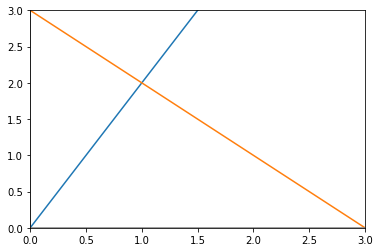

In [0]:
x = np.arange(-10, 10)
y = 2*x
y1 = -x + 3

plt.figure()
plt.plot(x, y)
plt.plot(x, y1)
plt.xlim(0, 3)
plt.ylim(0, 3)
# draw axes
plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')
plt.show()

Podemos ver que la solución (correspondiente al cruce de línea) es cuando $x = 1$ y $y = 2$. ¡Confirma lo que encontramos con la inversión de la matriz!

### Matrices singulares

Algunas matrices no son invertibles. Se llaman **singulares**.

## 4 - Dependencia lineal y sistema de generadores

Comencemos nuevamente con el conjunto de ecuaciones:

$${Ax}={b}$$

Este sistema corresponde a:

$$
A_{1,1}x_1 + A_{1,2}x_2 + \cdots + A_{1,n}x_n = b_1 \\\\
A_{2,1}x_1 + A_{2,2}x_2 + \cdots + A_{2,n}x_n = b_2 \\\\
\cdots \\\\
A_{m,1}x_1 + A_{m,2}x_2 + \cdots + A_{m,n}x_n = b_m
$$

Entonces tenemos múltiples ecuaciones con múltiples incógnitas. Conocemos $A_{1,1} ... A_{m, n}$ y $b_1 ... b_m$. Para resolver el sistema necesitamos encontrar los valores de las variables $x_1 ... x_n$ que satisfacen todas las ecuaciones.


### Número de soluciones:

Lo primero que debemos preguntar cuando nos enfrentamos a este sistema de ecuaciones es: ¿cuál es el número de soluciones?

Tres casos pueden representar el número de soluciones del sistema de ecuaciones ${Ax} = {b}$.
 
 1. Sin solución
 2. 1 solución
 3. Un número infinito de soluciones.
 
#### ¿Por qué no puede haber más de 1 solución y menos de un número infinito de soluciones?

#### Intuición:

¡Simplemente porque tratamos con sistemas **lineales**! Dos líneas no pueden cruzarse más de una vez.

Para poder visualizarlo, tomemos dos dimensiones y dos ecuaciones. Las soluciones del sistema corresponden a la intersección de las líneas. Una opción es que las dos líneas nunca se crucen (paralelas). Otra opción es que se crucen una vez. Y finalmente, la última opción es que se crucen en todas partes (superpuestas):

<img src="images/number-solutions-system-equations.png" width="700" alt="Examples of systems of equations with 0, 1 and an infinite number of solutions" title="System of equations with 0, 1 and an infinite number of solutions">
<em>Un sistema de ecuaciones no tiene solución, 1 solución o un número infinito de soluciones</em>

<span class='pquote'>
    Dos rectas no pueden cruzarse más de una vez, pero pueden ser paralelas o superpuestas
</span>


### Representación matricial del sistema.

Como lo vimos, la ecuación ${Ax} = {b}$ se puede representar mediante una matriz ${A}$ que contiene los coeficientes de cada variable y un vector ${x}$ que contiene cada variable.

El producto de ${A}$ y ${x}$ da ${b}$ que es otro vector de tamaño $m$:

$$
\begin{bmatrix}
    A_{1,1} & A_{1,2} & \cdots & A_{1,n} \\\\
    A_{2,1} & A_{2,2} & \cdots & A_{2,n} \\\\
    \cdots & \cdots & \cdots & \cdots \\\\
    A_{m,1} & A_{m,2} & \cdots & A_{m,n}
\end{bmatrix}
\times
\begin{bmatrix}
    x_1 \\\\
    x_2 \\\\
    \cdots \\\\
    x_n
\end{bmatrix}
=
\begin{bmatrix}
    b_1 \\\\
    b_2 \\\\
    \cdots \\\\
    b_m
\end{bmatrix}
$$


Que corresponde al conjunto de ecuaciones lineales

$$
A_{1,1}x_1 + A_{1,2}x_2 + \cdots + A_{1,n}x_n = b_1 \\\\
A_{2,1}x_1 + A_{2,2}x_2 + \cdots + A_{2,n}x_n = b_2 \\\\
\cdots \\\\
A_{m,1}x_1 + A_{m,2}x_2 + \cdots + A_{m,n}x_n = b_m
$$

Aquí hay algunas intuiciones sobre lo que representan estas matrices. El número de columnas de ${A}$ es el número de dimensiones de nuestro espacio vectorial. Es el número $n$ de direcciones por las que podemos viajar. El número de soluciones de nuestro sistema lineal corresponde al número de formas en que podemos alcanzar ${b}$ viajando a través de nuestras dimensiones $n$.

### Sistemas compatibles/incompatibles y determinados/indeterminados

- Sistema compatible si tiene solución, en este caso además puede distinguirse entre:
    - Sistema compatible determinado cuando tiene una única solución.
    - Sistema compatible indeterminado cuando admite un conjunto infinito de soluciones.
    - Sistema incompatible si no tiene solución.




En el siguiente ejemplo podemos ver un sistema de 3 ecuaciones (representadas por 3 rectas) y 2 incógnitas (correspondientes a 2 dimensiones). En este ejemplo no hay solución ya que no hay ningún punto que pertenezca a las tres líneas. Es un sistema incompatible.

<img src="images/overdetermined-system-linear-equations.png" width="300" alt="Example of an overdetermined system of linear equations with no solution" title="Example of an overdetermined system of linear equations with no solution">
<em>Ejemplo de un sistema incompatible de ecuaciones lineales sin solución</em>


- Si hay más incógnitas que ecuaciones, el sistema se llama **indeterminado**. En la siguiente imagen, solo hay 1 ecuación (1 recta) y 2 dimensiones. Cada punto que está en la línea es una solución del sistema. En este caso hay un número infinito de soluciones:

<img src="images/underdetermined-system-linear-equations.png" width="300" alt="Example of an underdetermined system of linear equations with an infinite number of solutions" title="Example of an underdetermined system of linear equations with an infinite number of solutions">
<em>Ejemplo de un sistema indeterminado de ecuaciones lineales con un número infinito de soluciones.</em>


Veamos algunos ejemplos de estos diferentes casos para aclarar eso.

#### Ejemplo 4.1.

$m$=2, $n$=2: **2 ecuaciones y 2 incógnitas**

$$
A_{1,1}x_1 + A_{1,2}x_2 = b_1\\\\
A_{2,1}x_1 + A_{2,2}x_2 = b_2
$$

Tomemos estas ecuaciones como ejemplo:

$$
\begin{cases}
y = 2x + 1\\\\
y = 6x - 2
\end{cases}
$$

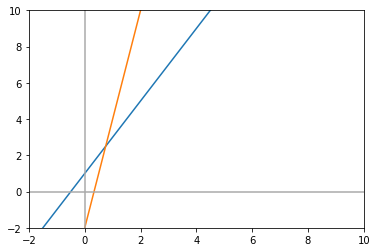

In [0]:
x = np.arange(-10, 10)
y = 2*x + 1
y1 = 6*x - 2

plt.figure()
plt.plot(x, y)
plt.plot(x, y1)
plt.xlim(-2, 10)
plt.ylim(-2, 10)
# draw axes
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')
plt.show()

Como hemos visto, con 2 rectas en un espacio 2-D, existen múltiples casos posibles. En la figura anterior, las dos líneas se cruzan, por lo que hay una solución única. Si se superponen hay un número infinito de soluciones ya que cada punto de las líneas corresponde a una intersección. Si son paralelos, no hay solución.

Lo mismo puede observarse con otros valores de $m$ (número de ecuaciones) y $n$ (número de dimensiones). Por ejemplo, dos planos bidimensionales en un espacio tridimensional pueden superponerse (infinitas soluciones) o cruzarse (infinitas soluciones ya que su cruce es una línea) o paralelos (sin solución).

#### Ejemplo 4.2

$m$=3, $n$=2: **3 ecuaciones y 2 incógnitas**

$$
A_{1,1}x_1 + A_{1,2}x_2 = b_1\\\\
A_{2,1}x_1 + A_{2,2}x_2 = b_2\\\\
A_{3,1}x_1 + A_{3,2}x_2 = b_3
$$

La misma idea se presenta con más de 2 ecuaciones en un espacio 2-D. En ese ejemplo tenemos las siguientes 3 ecuaciones:

$$
\begin{cases}
y = 2x + 1\\\\
y = 6x - 2\\\\
y = \frac{1}{10}x+6
\end{cases}
$$

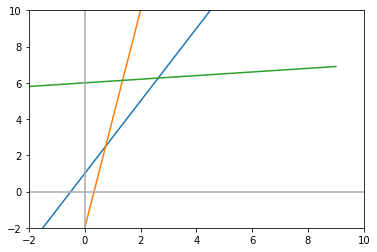

In [0]:
x = np.arange(-10, 10)
y = 2*x + 1

y1 = 6*x - 2
y2 = 0.1*x+6

plt.figure()
plt.plot(x, y)
plt.plot(x, y1)
plt.plot(x, y2)
plt.xlim(-2, 10)
plt.ylim(-2, 10)
# draw axes
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')
plt.show()
plt.close()

### Combinación Lineal

La combinación lineal de 2 vectores corresponde a su suma ponderada.

#### Example 4.3:

Tomemos 2 vectores:

$$
\vec{u}=
\begin{bmatrix}
    1 \\\\
    3
\end{bmatrix}
$$

y

$$
\vec{v}=
\begin{bmatrix}
    2 \\\\
    1
\end{bmatrix}
$$

Estos dos vectores tienen 2 dimensiones y, por lo tanto, contienen coordenadas en 2-D.


La combinación lineal de $\vec{u}$ y $\vec{v}$ es

$$
a\vec{u}+b\vec{v}= a
\begin{bmatrix}
    1 \\\\
    3
\end{bmatrix} + b\begin{bmatrix}
    2 \\\\
    1
\end{bmatrix}
$$


donde $a$ y $b$ son los pesos de los vectores.

Gráficamente, los vectores se suman para alcanzar un punto específico en el espacio. Por ejemplo, si $a=2$ y $b=1$:


$$
2\vec{u}+\vec{v}= 2
\begin{bmatrix}
    1 \\\\
    3
\end{bmatrix} +
\begin{bmatrix}
    2 \\\\
    1
\end{bmatrix} =
\begin{bmatrix}
    2 \cdot 1 + 2 \\\\
    2 \cdot 3 + 1
\end{bmatrix} =
\begin{bmatrix}
    4 \\\\
    7
\end{bmatrix}
$$

La combinación lineal de $\vec{u}$ y $\vec{v}$ es un vector que alcanzará el punto de coordenadas $(4,7)$. Para mostrar eso en un gráfico, usaremos la función `plotVectors()` que toma un conjunto de coordenadas y una matriz de colores como entrada y traza los vectores correspondientes. 


In [0]:
def plotVectors(vecs, cols, alpha=1):
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.figure()
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                  alpha=alpha)

(0, 5)

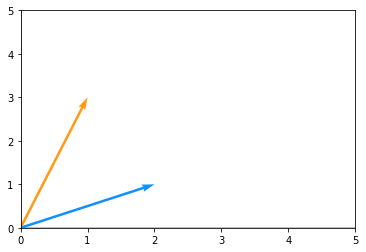

In [0]:
orange = '#FF9A13'
blue = '#1190FF'
plotVectors([[1, 3], [2, 1]], [orange, blue])
plt.xlim(0, 5)
plt.ylim(0, 5)

Ahora vamos a realizar una combinación lineal de estos vectores.

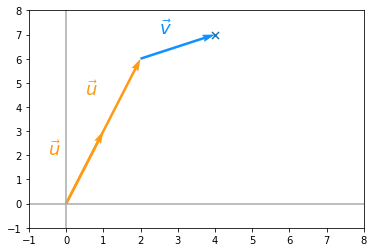

In [0]:
# Coeficientes
a = 2
b = 1

# Coordenadas de los vectores:
u = [0,0,1,3]
v = [2,6,2,1]

plt.quiver([u[0], a*u[0], b*v[0]],
           [u[1], a*u[1], b*v[1]],
           [u[2], a*u[2], b*v[2]],
           [u[3], a*u[3], b*v[3]],
           angles='xy', scale_units='xy', scale=1, color=[orange, orange, blue])
plt.xlim(-1, 8)
plt.ylim(-1, 8)

# Ejes
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')
plt.scatter(4,7,marker='x',s=50)

# Nombres de los vectores
plt.text(-0.5, 2, r'$\vec{u}$', color=orange, size=18)
plt.text(0.5, 4.5, r'$\vec{u}$', color=orange, size=18)
plt.text(2.5, 7, r'$\vec{v}$', color=blue, size=18)
plt.show()

Podemos ver que terminamos con las coordenadas ($4$, $7$).

### Sistema de generadores

Tome los vectores $\vec{u}$ y $\vec{v}$ del ejemplo anterior y piense en todos los puntos a los que puede llegar combinándolos linealmente al cambiar $a$ y $b$. Este conjunto de puntos es el subespacio generado por los vectores $\{\vec{u},\vec{v}\}$.

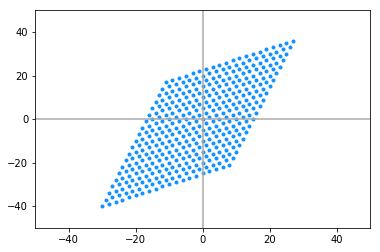

In [0]:
# Definimos u y v: 
u = [1, 3]
v = [2, 1]

# Graficamos una muestra de puntos del subespacio generado por u y v:
for a in range(-10, 10):
    for b in range(-10, 10):
        plt.scatter(u[0] * a + v[0] * b, u[1] * a + v[1] * b, marker='.', color=blue)

# Definimos los límites de los ejes:
plt.xlim(-50, 50)
plt.ylim(-50, 50)

# Ploteamos los ejes:
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')

plt.show()

#### Nota sobre espacios y subespacios

(Para más detalles ver Strang (2006), p.70)

Si toma un plano bidimensional en $\mathbb{R}^3$ (espacio tridimensional), este plano es un **subespacio** de su espacio original $\mathbb{R}^3$. De la misma manera, si comienza con un espacio $\mathbb{R}^2$ y toma una recta en este espacio, esta recta es un subespacio del espacio original.


La combinación lineal de vectores da vectores en el espacio original. Cada combinación lineal de vectores dentro de un espacio permanecerá en este espacio. Por ejemplo, si toma 2 rectas en un espacio $\mathbb{R}^2$, cualquier combinación lineal le dará un vector en el mismo espacio $\mathbb{R}^2$.

<span class='pquote'>
    La combinación lineal de vectores da vectores en el espacio original.
</span>

### El espacio columna de una matriz

También es posible representar el conjunto de ecuaciones considerando que el vector solución ${b}$ corresponde a una combinación lineal de cada columna multiplicada por sus coeficientes.

Del conjunto de ecuaciones:

$$
A_{1,1}x_1 + A_{1,2}x_2 + A_{1,n}x_n = b_1 \\\\
A_{2,1}x_1 + A_{2,2}x_2 + A_{2,n}x_n = b_2 \\\\
\cdots \\\\
A_{m,1}x_1 + A_{m,2}x_2 + A_{m,n}x_n = b_m
$$

La forma columna es entonces:

$$
x_1
\begin{bmatrix}
    A_{1,1}\\\\
    A_{2,1}\\\\
    A_{m,1}
\end{bmatrix}
+
x_2
\begin{bmatrix}
    A_{1,2}\\\\
    A_{2,2}\\\\
    A_{m,2}
\end{bmatrix}
+
x_n
\begin{bmatrix}
    A_{1,n}\\\\
    A_{2,n}\\\\
    A_{m,n}
\end{bmatrix}
=
\begin{bmatrix}
    b_1\\\\
    b_2\\\\
    b_m
\end{bmatrix}
$$


Desde un punto de vista gráfico, tenemos que viajar desde el origen (cero en todas las dimensiones) hasta el punto de coordenada ${b}$. Las columnas de ${A}$ nos dan las direcciones por las que podemos viajar y sus coeficientes son la longitud del camino en esa dirección.


<span class='pquote'>
     Las columnas de ${A}$ nos dan las direcciones por las que podemos viajar y sus coeficientes son la longitud del camino en cada dirección.
</span>

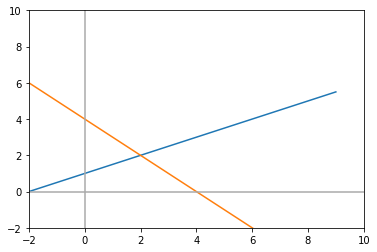

In [0]:
x = np.arange(-10, 10)
y = 0.5*x + 1

y1 = -x + 4

plt.figure()
plt.plot(x, y)
plt.plot(x, y1)
plt.xlim(-2, 10)
plt.ylim(-2, 10)
# draw axes
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')
plt.show()
plt.close()

### Determinar si el sistema tiene una y solo una solución para cada valor de ${b}$

Ahora veremos cómo determinar si un sistema de ecuaciones tiene una y solo una solución. Esto se puede dividir en dos condiciones:

1. El sistema debe tener al menos una solución
2. Entonces, el sistema debe tener **solo** una solución


#### Sistema subdeterminado: el sistema debe tener al menos una solución para cada valor de ${b}$: $n\geq m$

<span class='pquote'>
     Un sistema de ecuaciones subdeterminado es un sistema con menos ecuaciones que incógnitas
</span>

Si queremos que nuestro sistema tenga una única solución, un primer requisito es que $n$ no debe ser mayor que $m$.

Tomemos el ejemplo de una matriz ($2\times3$) que corresponde a un conjunto de 2 ecuaciones con 3 variables desconocidas:


<div>
$$
\begin{cases}
8x+y+z=1\\\\
x+y+z=1
\end{cases}
$$
</div>

<div>
$$
x
\begin{bmatrix}
    8 \\\\
    1
\end{bmatrix}
+
y
\begin{bmatrix}
    1 \\\\
    1
\end{bmatrix}
+
z
\begin{bmatrix}
    1 \\\\
    1
\end{bmatrix}
=
\begin{bmatrix}
    1 \\\\
    1
\end{bmatrix}
$$
</div>

Aquí está la representación de los planos trazados con la ayuda de este [sitio web](https://technology.cpm.org/general/3dgraph/):

<img src="images/intersection-2-planes-line.png" alt="Plot showing two planes. The intersection of the two planes is a line" title="The intersection of the two planes is a line" width="500">
<em>La intersección de 2 planos es una recta</em>

Podemos ver que, en el mejor de los casos, los dos planos no son paralelos y hay soluciones para el conjunto de ecuaciones. Significa que existen algunos puntos que dependen de ambos planos. Pero también podemos ver que inevitablemente hay un número infinito de puntos en la intersección (una línea que podemos ver en la figura). Necesitamos un tercer plano para tener una solución única.

#### Sistema sobredeterminado: el sistema debe tener **solo** una solución para cada valor de ${b}$: $m\geq n$


<span class='pquote'>
     Un sistema de ecuaciones sobredeterminado es un sistema con más ecuaciones que incógnitas
</span>

La expresión por columnas es útil para comprender por qué el sistema lineal generalmente no tiene solución si $n$ (el número de incógnitas) es menor que $m$ (el número de ecuaciones). Ejemplo:

<div>
$$
\begin{cases}
y = \frac{1}{2}x+1\\\\
y = -x + 4\\\\
y = 7x + 2
\end{cases}
\Leftrightarrow
\begin{cases}
\frac{1}{2}x-y = -1\\\\
x+y=4\\\\
7x-y=2
\end{cases}
$$
</div>

Corresponde a :

<div>
$$
x
\begin{bmatrix}
    \frac{1}{2} \\\\
    1 \\\\
    7
\end{bmatrix}
+
y
\begin{bmatrix}
    -1 \\\\
    1 \\\\
    -1
\end{bmatrix}
=
\begin{bmatrix}
    -1 \\\\
    4 \\\\
    2
\end{bmatrix}
$$
</div>

Así que todavía estamos viajando en nuestro espacio bidimensional pero el punto que estamos buscando está definido por 3 dimensiones. Hay casos en los que la tercera coordenada no depende de nuestro plano bidimensional $x$ - $y$. En ese caso no existe solución.

<span class='pquote'>
     Estamos viajando en un espacio 2D pero la solución está definida por 3 dimensiones. Si la tercera coordenada no se encuentra en nuestro plano 2D $x$ - $y$, entonces no hay solución.
</span>

#### Dependencia lineal

El número de columnas puede proporcionar información sobre el número de soluciones. Pero el número que tenemos que tener en cuenta es el número de columnas **linealmente independientes**. Las columnas son linealmente dependientes si una de ellas es una combinación lineal de las otras. Pensando en la imagen de la columna, la dirección de dos vectores linealmente dependientes es la misma. Esto no agrega una dimensión que podamos usar para viajar y alcanzar ${b}$.

Aquí hay un ejemplo de sistema lineal que contiene dependencia lineal:

$$
\begin{cases}
y = 2x+6\\\\
y = 2x
\end{cases}
\Leftrightarrow
\begin{cases}
2x-y = -6\\\\
2x-y=0
\end{cases}
$$

Las filas muestra que el sistema no tiene solución:

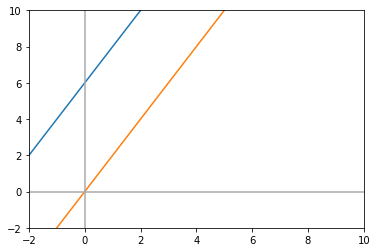

In [0]:
x = np.arange(-10, 10)
y = 2*x + 6

y1 = 2*x

plt.figure()
plt.plot(x, y)
plt.plot(x, y1)
plt.xlim(-2, 10)
plt.ylim(-2, 10)
# draw axes
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')
plt.show()
plt.close()

Como las rectas son paralelas, no hay punto de intersección.

Lo podemos expresar como combinación lineal de columnas:

$$
x
\begin{bmatrix}
    2 \\\\
    2
\end{bmatrix}
+
y
\begin{bmatrix}
    -1 \\\\
    -1
\end{bmatrix}
=
\begin{bmatrix}
    -6 \\\\
    0
\end{bmatrix}
$$

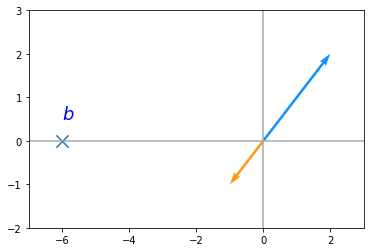

In [0]:
u = [0,0,2,2]
v = [0,0,-1,-1]

plt.quiver([u[0], v[0]],
           [u[1], v[1]],
           [u[2], v[2]],
           [u[3], v[3]],
           angles='xy', scale_units='xy', scale=1, color=[blue, orange])
plt.xlim(-7, 3)
plt.ylim(-2, 3)
# draw axes
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')
plt.scatter(-6,0,marker='x',s=150)
plt.text(-6, 0.5, r'$b$', color='b', size=18)
plt.show()

Nos gustaría ir a $ b $ pero el único camino que podemos tomar es la línea azul / naranja. La segunda ecuación no nos proporciona una nueva dirección que tomar, ya que es solo una combinación lineal de la primera.

Por lo tanto, un sistema sobredeterminado de ecuaciones independientes tiene como máximo 1 solución.

### Matrices cuadradas

¿Cómo podemos cumplir con las 2 condiciones ($m\geq n$ y $n\geq m$)? ¡Tenemos que tener $m=n$!

El resultado de todo esto es que el sistema necesita una **matriz cuadrada** ${A}$ ($m=n$) con columnas linealmente independientes para obtener una única solución para cada ${b}$.

<span class='pquote'>
    El sistema necesita una matriz cuadrada ${A}$ ($m=n$) con columnas linealmente independientes para obtener una única solución para cada ${b}$
</span>

#### La inversa de una matriz existe solo si el conjunto de ecuaciones tiene una única solución para cada valor de ${b}$.

### 5 - Normas

Las normas son funciones que se caracterizan por las siguientes propiedades:

1- Las normas son valores no negativos. Si piensa en las normas como una longitud, se entiende fácilmente por qué no puede ser negativo.

2- Las normas son $0$ si y solo si el vector es un vector cero

3- Las normas respetan la desigualdad triangular. Ver abajo.

4- $||{k}\cdot {u}|| =|{k}| \cdot ||{u}||$. La norma de un vector multiplicado por un escalar es igual al valor absoluto de este escalar multiplicado por la norma del vector.

Generalmente se escribe con dos barras horizontales: $||{x}||$


### La desigualdad triangular:

La norma de la suma de dos vectores es menor o igual que la suma de las normas de estos vectores.

$$
||{u}+{v}|| \leq ||{u}||+||{v}||
$$

#### Ejemplo 5.1:

$$
{u}=
\begin{bmatrix}
    1 & 6
\end{bmatrix}
$$

y

$$
{v}=
\begin{bmatrix}
    4 & 2
\end{bmatrix}
$$

$$
||{u}+{v}|| = \sqrt{(1+4)^2+(6+2)^2} = \sqrt{89} \approx 9.43
$$

$$
||{u}||+||{v}|| = \sqrt{1^2+6^2}+\sqrt{4^2+2^2} = \sqrt{37}+\sqrt{20} \approx 10.55
$$

Revisemos estos resultados con Numpy:

In [0]:
u = np.array([1, 6])
u

array([1, 6])

In [0]:
v = np.array([4, 2])
v

array([4, 2])

In [0]:
u+v

array([5, 8])

In [0]:
np.linalg.norm(u+v)

9.433981132056603

In [0]:
np.linalg.norm(u)+np.linalg.norm(v)

10.554898485297798

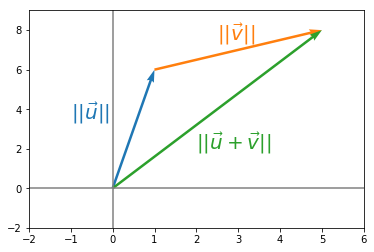

In [0]:
u = [0,0,1,6]
v = [0,0,4,2]
u_bis = [1,6,v[2],v[3]]
w = [0,0,5,8]
plt.quiver([u[0], u_bis[0], w[0]],
           [u[1], u_bis[1], w[1]],
           [u[2], u_bis[2], w[2]],
           [u[3], u_bis[3], w[3]],
           angles='xy', scale_units='xy', scale=1, color=sns.color_palette())
# plt.rc('text', usetex=True)
plt.xlim(-2, 6)
plt.ylim(-2, 9)
plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')

plt.text(-1, 3.5, r'$||\vec{u}||$', color=sns.color_palette()[0], size=20)
plt.text(2.5, 7.5, r'$||\vec{v}||$', color=sns.color_palette()[1], size=20)
plt.text(2, 2, r'$||\vec{u}+\vec{v}||$', color=sns.color_palette()[2], size=20)

plt.show()
plt.close()

<span class='pquote'>
    Geométricamente, esto simplemente significa que el camino más corto entre dos puntos es una línea
</span>

# Normas-P: reglas generales

Aquí está la receta para obtener la forma $p$ de un vector:

1. Calcular el valor absoluto de cada elemento
2. Tome el poder $p$ de estos valores absolutos
3. Sume todos estos valores absolutos potenciados
4. Tome el poder $\frac{1}{p}$ de este resultado

Esto se expresa más condensadamente con la fórmula:

$$
||{x}||_p=(\sum_i|{x}_i|^p)^{1/p}
$$

Veamos algunos ejemplos.

### La Norma $L^1$ 

$p=1$ entonces esta norma es simplemente la suma de los valores absolutos:

$$
||{x}||_1=\sum_{i} |{x}_i|
$$

### La norma euclídea ($L^2$ norm)

La norma euclídea es la norma $p$ con $p = 2$. Esta puede ser la norma más utilizada con la norma al cuadrado $L^2$.

$$
||{x}||_2=(\sum_i {x}_i^2)^{1/2}\Leftrightarrow \sqrt{\sum_i {x}_i^2}
$$

Veamos un ejemplo:

#### Example 5.2.

Gráficamente, la norma euclidiana corresponde a la longitud del vector desde el origen hasta el punto obtenido por combinación lineal (como la aplicación del teorema de Pitágoras).

$$
{u}=
\begin{bmatrix}
    3 \\\\
    4
\end{bmatrix}
$$

$$
\begin{align*}
||{u}||_2 &=\sqrt{|3|^2+|4|^2}\\\\
&=\sqrt{25}\\\\
&=5
\end{align*}
$$


So the $L^2$ norm is $5$.

La norma $L^2$ se puede calcular con la función `linalg.norm` de numpy. Podemos verificar el resultado:

In [0]:
np.linalg.norm([3, 4])

5.0

Lo vemos gráficamente:

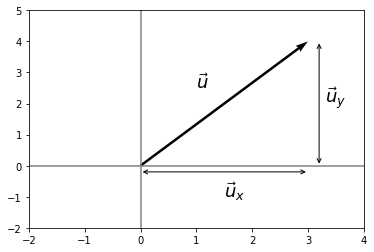

In [0]:
u = [0,0,3,4]

plt.quiver([u[0]],
           [u[1]],
           [u[2]],
           [u[3]],
           angles='xy', scale_units='xy', scale=1)

plt.xlim(-2, 4)
plt.ylim(-2, 5)
plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')

plt.annotate('', xy = (3.2, 0), xytext = (3.2, 4),
             arrowprops=dict(edgecolor='black', arrowstyle = '<->'))
plt.annotate('', xy = (0, -0.2), xytext = (3, -0.2),
             arrowprops=dict(edgecolor='black', arrowstyle = '<->'))

plt.text(1, 2.5, r'$\vec{u}$', size=18)
plt.text(3.3, 2, r'$\vec{u}_y$', size=18)
plt.text(1.5, -1, r'$\vec{u}_x$', size=18)

plt.show()

### La norma $L^2$ al cuadrado

$$
\sum_i|{x}_i|^2
$$


La norma $L^2$ al cuadrado es conveniente porque elimina la raíz cuadrada y terminamos con la suma simple de todos los valores al cuadrado del vector.

La norma euclidiana al cuadrado se usa ampliamente en machine learning, en parte porque se puede calcular con la operación vectorial ${x}^\text{T}{x}$.


#### Example 5.3.

$$
{x}=
\begin{bmatrix}
    2 \\\\
    5 \\\\
    3 \\\\
    3
\end{bmatrix}
$$

$$
{x}^\text{T}=
\begin{bmatrix}
    2 & 5 & 3 & 3
\end{bmatrix}
$$

$$
\begin{align*}
{x}^\text{T}{x}&=
\begin{bmatrix}
    2 & 5 & 3 & 3
\end{bmatrix} \times
\begin{bmatrix}
    2 \\\\
    5 \\\\
    3 \\\\
    3
\end{bmatrix}\\\\
&= 2\times 2 + 5\times 5 + 3\times 3 + 3\times 3= 47
\end{align*}
$$

In [0]:
x = np.array([[2], [5], [3], [3]])
x

array([[2],
       [5],
       [3],
       [3]])

In [0]:
euclideanNorm = x.T.dot(x)
euclideanNorm

array([[47]])

In [0]:
np.linalg.norm(x)**2

47.0

### La norma max

Es la norma $L^\infty$ y corresponde al valor absoluto del elemento más grande del vector.

$$
||{x}||_\infty = \max\limits_i|x_i|
$$


### Normas matriciales: la norma de Frobenius

$$
||{A}||_F=\sqrt{\sum_{i,j}A^2_{i,j}}
$$


Esto es equivalente a tomar la norma $L^2$ de la matriz después de aplanar.

Se puede usar la misma función de Numpy:

In [0]:
A = np.array([[1, 2], [6, 4], [3, 2]])
A

array([[1, 2],
       [6, 4],
       [3, 2]])

In [0]:
np.linalg.norm(A)

8.366600265340756

####  El producto escalar de dos vectores puede ser escrito en términos de sus normas y el ángulo entre ellos. 

$$
{x}^\text{T}{y} = ||{x}||_2\cdot||{y}||_2\cos\theta
$$

#### Ejemplo 5.4.

$$
{x}=
\begin{bmatrix}
    0 \\\\
    2
\end{bmatrix}
$$

y 

$$
{y}=
\begin{bmatrix}
    2 \\\\
    2
\end{bmatrix}
$$

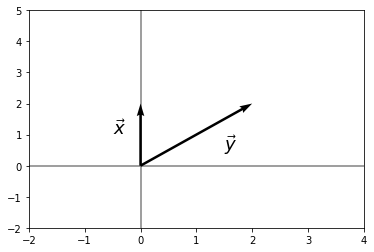

In [0]:
x = [0,0,0,2]
y = [0,0,2,2]

plt.xlim(-2, 4)
plt.ylim(-2, 5)
plt.axvline(x=0, color='grey', zorder=0)
plt.axhline(y=0, color='grey', zorder=0)

plt.quiver([x[0], y[0]],
           [x[1], y[1]],
           [x[2], y[2]],
           [x[3], y[3]],
           angles='xy', scale_units='xy', scale=1)

plt.text(-0.5, 1, r'$\vec{x}$', size=18)
plt.text(1.5, 0.5, r'$\vec{y}$', size=18)

plt.show()
plt.close()

Tomamos este ejemplo por su simplicidad. Como podemos ver, el ángulo $ \ theta $ es igual a 45 °.

$$
{x^\text{T}y}=
\begin{bmatrix}
    0 & 2
\end{bmatrix} \cdot
\begin{bmatrix}
    2 \\\\
    2
\end{bmatrix} =
0\times2+2\times2 = 4
$$

and

$$
||{x}||_2=\sqrt{0^2+2^2}=\sqrt{4}=2
$$

$$
||{y}||_2=\sqrt{2^2+2^2}=\sqrt{8}
$$

$$
2\times\sqrt{8}\times cos(45)=4
$$

Veamos las operaciones usando Numpy:

In [0]:
# Nota: np.cos() toma los ángulos en radianes

2*np.sqrt(8)*np.cos(np.deg2rad(45))

4.000000000000001

## 6 Clases especiales de matrices y vectores

<img src="https://raw.githubusercontent.com/sebamacchia/digitalHouse/master/images/images/diagonal-and-symmetric-matrices.png?token=AGCOYRNHYJ6GXVUORDEPITK5JIHRS" width="400" alt="Diagonal and symmetric matrices" title="Diagonal and symmetric matrices">
<em>Ejemplos de matrices diagonales y simétricas</em>


### Matrices diagonales

<img src="https://raw.githubusercontent.com/sebamacchia/digitalHouse/master/images/images/diagonal-matrix.png?token=AGCOYRN42EDGCVH4KX7AN5K5JIHUA" width="150" alt="Example of a diagonal matrix" title="Diagonal matrix">
<em>Ejemplo de matríz diagonal</em>

Una matríz ${A}_{i,j}$ es diagonal si todas sus entradas son ceros excepto en la diagonal (cuando $ i = j $).

#### Ejemplo 6.1.

$$
{D}=
\begin{bmatrix}
    2 & 0 & 0 & 0\\\\
    0 & 4 & 0 & 0\\\\
    0 & 0 & 3 & 0\\\\
    0 & 0 & 0 & 1
\end{bmatrix}
$$

En este caso, la matriz también es cuadrada, pero puede haber matrices diagonales no cuadradas.

#### Ejemplo 6.2.

$$
{D}=
\begin{bmatrix}
    2 & 0 & 0\\\\
    0 & 4 & 0\\\\
    0 & 0 & 3\\\\
    0 & 0 & 0
\end{bmatrix}
$$

O

$$
{D}=
\begin{bmatrix}
    2 & 0 & 0 & 0\\\\
    0 & 4 & 0 & 0\\\\
    0 & 0 & 3 & 0
\end{bmatrix}
$$

La matriz diagonal se puede denotar $diag({v})$ donde ${v}$ es el vector que contiene los valores diagonales.

#### Ejemplo 6.3.

$$
{D}=
\begin{bmatrix}
    2 & 0 & 0 & 0\\\\
    0 & 4 & 0 & 0\\\\
    0 & 0 & 3 & 0\\\\
    0 & 0 & 0 & 1
\end{bmatrix}
$$

En esta matríz, ${v}$ es el siguiente vector:

$$
{v}=
\begin{bmatrix}
    2\\\\
    4\\\\
    3\\\\
    1
\end{bmatrix}
$$

La función de Numpy `diag()` se puede usar para crear matrices diagonales cuadradas:

In [0]:
v = np.array([2, 4, 3, 1])
np.diag(v)

array([[2, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 1]])

La multiplicación entre una matriz diagonal y un vector es solo una ponderación de cada elemento del vector por $v$:

#### Ejemplo 6.4.

$$
{D}=
\begin{bmatrix}
    2 & 0 & 0 & 0\\\\
    0 & 4 & 0 & 0\\\\
    0 & 0 & 3 & 0\\\\
    0 & 0 & 0 & 1
\end{bmatrix}
$$

y

$$
{x}=
\begin{bmatrix}
    3\\\\
    2\\\\
    2\\\\
    7
\end{bmatrix}
$$

$$
\begin{align*}
&{Dx}=
\begin{bmatrix}
    2 & 0 & 0 & 0\\\\
    0 & 4 & 0 & 0\\\\
    0 & 0 & 3 & 0\\\\
    0 & 0 & 0 & 1
\end{bmatrix} \times
\begin{bmatrix}
    3\\\\
    2\\\\
    2\\\\
    7
\end{bmatrix}\\\\
&=\begin{bmatrix}
    2\times3 + 0\times2 + 0\times2 + 0\times7\\\\
    0\times3 + 4\times2 + 0\times2 + 0\times7\\\\
    0\times3 + 0\times2 + 3\times2 + 0\times7\\\\
    0\times3 + 0\times2 + 0\times2 + 1\times7
\end{bmatrix}\\\\
&=
\begin{bmatrix}
    2\times3\\\\
    4\times2\\\\
    3\times2\\\\
    1\times7
\end{bmatrix}
\end{align*}
$$

Las matrices no cuadradas tienen las mismas propiedades:

#### Ejemplo 6.5.

$$
{D}=
\begin{bmatrix}
    2 & 0 & 0\\\\
    0 & 4 & 0\\\\
    0 & 0 & 3\\\\
    0 & 0 & 0
\end{bmatrix}
$$

y

$$
{x}=
\begin{bmatrix}
    3\\\\
    2\\\\
    2
\end{bmatrix}
$$

$$
{Dx}=
\begin{bmatrix}
    2 & 0 & 0\\\\
    0 & 4 & 0\\\\
    0 & 0 & 3\\\\
    0 & 0 & 0
\end{bmatrix}
\times
\begin{bmatrix}
    3\\\\
    2\\\\
    2
\end{bmatrix}
=
\begin{bmatrix}
    2\times3\\\\
    4\times2\\\\
    3\times2\\\\
    0
\end{bmatrix}
$$

La inversa de una matriz diagonal cuadrada existe si todas las entradas de la diagonal no son ceros. Si es el caso, la inversión es fácil de encontrar. Además, el inverso no existe si la matriz no es cuadrada.

$$
{D}=
\begin{bmatrix}
    2 & 0 & 0 & 0\\\\
    0 & 4 & 0 & 0\\\\
    0 & 0 & 3 & 0\\\\
    0 & 0 & 0 & 1
\end{bmatrix}
$$

$$
{D}^{-1}=
\begin{bmatrix}
    \frac{1}{2} & 0 & 0 & 0\\\\
    0 & \frac{1}{4} & 0 & 0\\\\
    0 & 0 & \frac{1}{3} & 0\\\\
    0 & 0 & 0 & \frac{1}{1}
\end{bmatrix}
$$

$$
{D}=
\begin{bmatrix}
    2 & 0 & 0 & 0\\\\
    0 & 4 & 0 & 0\\\\
    0 & 0 & 3 & 0\\\\
    0 & 0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
    \frac{1}{2} & 0 & 0 & 0\\\\
    0 & \frac{1}{4} & 0 & 0\\\\
    0 & 0 & \frac{1}{3} & 0\\\\
    0 & 0 & 0 & \frac{1}{1}
\end{bmatrix}=
\begin{bmatrix}
    1 & 0 & 0 & 0\\\\
    0 & 1 & 0 & 0\\\\
    0 & 0 & 1 & 0\\\\
    0 & 0 & 0 & 1
\end{bmatrix}
$$

Verifiquemos con Numpy que la multiplicación de la matriz con su invera nos da la matriz de identidad:

In [0]:
A = np.array([[2, 0, 0, 0], [0, 4, 0, 0], [0, 0, 3, 0], [0, 0, 0, 1]])
A

In [0]:
A_inv = np.array([[1/2., 0, 0, 0], [0, 1/4., 0, 0], [0, 0, 1/3., 0], [0, 0, 0, 1/1.]])
A_inv

In [0]:
A.dot(A_inv)

### Matrices simétricas

<img src="images/symmetric-matrix.png" width="150" alt="Illustration of a symmetric matrix" title="Symmetric matrix">
<em>Ejemplo de una matriz simétrica</em>

La matriz $A$ es simétrica si es igual a su transpuesta:
    
$$
{A} = {A}^\text{T}
$$

Esta es una propiedad solamente de las matrices cuadradas

#### Ejemplo 6.6.

$$
{A}=
\begin{bmatrix}
    2 & 4 & -1\\\\
    4 & -8 & 0\\\\
    -1 & 0 & 3
\end{bmatrix}
$$

In [0]:
A = np.array([[2, 4, -1], [4, -8, 0], [-1, 0, 3]])
A

In [0]:
A.T

### Vectores Unitarios

Un vector unitario es un vector de longitud igual a 1. Se puede denotar con una letra con un sombrero: $\hat{u}$

### Vectores Ortogonales

Dos vectores ortogonales están separados por un ángulo de 90 °. El producto escalar de dos vectores ortogonales da 0.

#### Ejemplo 6.7.

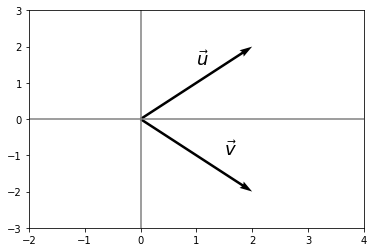

In [0]:
x = [0,0,2,2]
y = [0,0,2,-2]

plt.quiver([x[0], y[0]],
           [x[1], y[1]],
           [x[2], y[2]],
           [x[3], y[3]],
           angles='xy', scale_units='xy', scale=1)

plt.xlim(-2, 4)
plt.ylim(-3, 3)
plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')

plt.text(1, 1.5, r'$\vec{u}$', size=18)
plt.text(1.5, -1, r'$\vec{v}$', size=18)

plt.show()

$$
{x}= 
\begin{bmatrix}
    2\\\\
    2
\end{bmatrix}
$$

and

$${y}=
\begin{bmatrix}
    2\\\\
    -2
\end{bmatrix}
$$

$$
{x^\text{T}y}=
\begin{bmatrix}
    2 & 2
\end{bmatrix}
\begin{bmatrix}
    2\\\\
    -2
\end{bmatrix}=
\begin{bmatrix}
    2\times2 + 2\times-2
\end{bmatrix}=0
$$


Además, cuando la norma de los vectores ortogonales es la norma de la unidad, se denominan **ortonormal**.

<span class='pquote'>
    Es imposible tener más de $n$ vectores mutuamente ortogonales en $\mathbb{R}^n$.
</span>

Es imposible tener más de $n$ vectores mutuamente ortogonales en $\mathbb{R}^n$. Por ejemplo, intente dibujar 3 vectores en un espacio bidimensional ($\mathbb{R}^2$) que sean mutuamente ortogonales ...

### Matrices Ortogonales

Las matrices ortogonales son importantes porque tienen propiedades interesantes. Una matriz es ortogonal si las columnas son mutuamente ortogonales y tienen una norma unitaria (ortonormal) y las filas son mutuamente ortonormales y tienen una norma unitaria.


<img src="images/orthogonal-matrix.png" width="300" alt="Under the hood of an orthogonal matrix" title="Under the hood of an orthogonal matrix">
<em>Matriz ortogonal</em>

$$
{A}= 
\begin{bmatrix}
    A_{1,1} & A_{1,2}\\\\
    A_{2,1} & A_{2,2}
\end{bmatrix}
$$

Esto significa que 

$$
\begin{bmatrix}
    A_{1,1}\\\\
    A_{2,1}
\end{bmatrix}
$$

y

$$
\begin{bmatrix}
    A_{1,2}\\\\
    A_{2,2}
\end{bmatrix}
$$

son vectores ortogonales y también que las filas

$$
\begin{bmatrix}
    A_{1,1} & A_{1,2}
\end{bmatrix}
$$

y

$$
\begin{bmatrix}
    A_{2,1} & A_{2,2}
\end{bmatrix}
$$

son vectores ortogonales

### Propiedad 1: ${A^\text{T}A}={I}$

Una matriz ortogonal tiene esta propiedad:

$$
{A^\text{T}A}={AA^\text{T}}={I}
$$


Podemos ver que esta afirmación es verdadera con el siguiente razonamiento:

Tengamos la siguiente matriz:

$$
{A}=\begin{bmatrix}
    a & b\\\\
    c & d
\end{bmatrix}
$$

y por lo tanto

$$
{A}^\text{T}=\begin{bmatrix}
    a & c\\\\
    b & d
\end{bmatrix}
$$

Calculemos el producto escalar:

$$
\begin{align*}
&{A^\text{T}A}=\begin{bmatrix}
    a & c\\\\
    b & d
\end{bmatrix}
\begin{bmatrix}
    a & b\\\\
    c & d
\end{bmatrix}
=
\begin{bmatrix}
    aa + cc & ab + cd\\\\
    ab + cd & bb + dd
\end{bmatrix}\\\\
&=
\begin{bmatrix}
    a^2 + c^2 & ab + cd\\\\
    ab + cd & b^2 + d^2
\end{bmatrix}
\end{align*}
$$

Anteriormente, vimos que la norma al cuadrado del vector $\begin{bmatrix}
    a & c
\end{bmatrix}$ es igual $a^2+c^2$ ($L^2$ or squared $L^2$). Ademas, vimos que las filas de ${A}$ tienen norma igual a 1 porque ${A}$ is orthogonal. Esto significa que $a^2+c^2=1$ y $b^2+d^2=1$. Por lo tanto tenemos:

$$
{A^\text{T}A}=
\begin{bmatrix}
    1 & ab + cd\\\\
    ab + cd & 1
\end{bmatrix}
$$

Además, $ab+cd$ corresponde al producto de $\begin{bmatrix}
    a & c
\end{bmatrix} y \begin{bmatrix}
    b & d
\end{bmatrix}$:

$$
\begin{bmatrix}
    a & c
\end{bmatrix}
\begin{bmatrix}
    b\\\\
    d
\end{bmatrix}
=
ab+cd
$$

Y sabemos que las columnas son ortogonales, lo que significa que:

$$
\begin{bmatrix}
    a & c
\end{bmatrix}
\begin{bmatrix}
    b\\\\
    d
\end{bmatrix}=0
$$

Y por lo tanto tenemos la matriz identidad

$$
{A^\text{T}A}=\begin{bmatrix}
    1 & 0\\\\
    0 & 1
\end{bmatrix}
$$

### Propiedad 2: ${A}^\text{T}={A}^{-1}$

#### Ejemplo 6.8.

El seno y el coseno son convenientes para crear matrices ortogonales. Tomemos la siguiente matriz:

$$
{A}= 
\begin{bmatrix}
    cos(30º) & -sin(30º)\\\\
    sin(30º) & cos(30º)
\end{bmatrix}
$$

In [0]:
A = np.array([[np.cos(np.deg2rad(30)), -np.sin(np.deg2rad(30))],\
              [np.sin(np.deg2rad(30)), np.cos(np.deg2rad(30))]])
A

array([[ 0.8660254, -0.5      ],
       [ 0.5      ,  0.8660254]])

In [0]:
col0 = A[:, [0]]
col1 = A[:, [1]]
row0 = A[0].reshape(A.shape[1], 1)
row1 = A[1].reshape(A.shape[1], 1)

Comprobemos la ortogonalidad de las filas y columnas:

In [0]:
col0.T.dot(col1)

array([[0.]])

In [0]:
row0.T.dot(row1)

array([[0.]])

Comprobemos que:

$$
{A^\text{T}A}={AA^\text{T}}={I}
$$

y por lo tanto:

$$
{A}^\text{T}={A}^{-1}
$$

In [0]:
A.T.dot(A)

array([[1., 0.],
       [0., 1.]])

In [0]:
A.T

array([[ 0.8660254,  0.5      ],
       [-0.5      ,  0.8660254]])

In [0]:
np.linalg.inv(A)

array([[ 0.8660254,  0.5      ],
       [-0.5      ,  0.8660254]])